Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

# 1. Read the dataset to the python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_excel('iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
df['SL'].fillna(df['SL'].median(), inplace=True)
df['SW'].fillna(df['SL'].median(), inplace=True)
df['PL'].fillna(df['SL'].median(), inplace=True)

In [8]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Box plot of dataset')

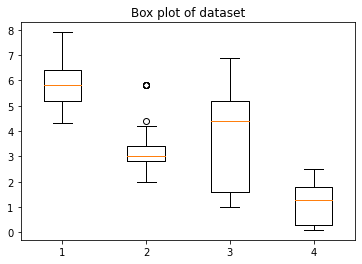

In [9]:
plt.boxplot(df[['SL','SW','PL','PW']])
plt.title('Box plot of dataset')

# 3. Find out which classification model gives the best result to predict iris species

In [10]:
x = df.drop(['Classification'],axis = 1)
y = df['Classification']
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(y)
scalar = preprocessing.StandardScaler()
x = scalar.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

## Logistic Regression

In [12]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [13]:
logit_regrsn = LogisticRegression()
model = logit_regrsn.fit(x_train, y_train)
predictions = model.predict(x_test)

In [14]:
print("Accuracy is :",accuracy_score(y_test,predictions ))

Accuracy is : 0.9666666666666667


In [15]:
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
DecisionTreeClassifier()
pred = model.predict(x_test)

In [18]:
print("The accuracy score is :",accuracy_score(y_test,pred))

The accuracy score is : 0.9666666666666667


In [19]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
value=[]
nbs=np.arange(3,15)
for k in nbs:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,pred)
    value.append(acc)
value

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## SVM

In [23]:
from sklearn import svm
dtc=svm.SVC()
dtc.fit(x_train,y_train)
ypred=dtc.predict(x_test)
accuracy_score(y_test,ypred)

0.9333333333333333

In [24]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [25]:
confusion_matrix(y_test,ypred)

array([[10,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 11]], dtype=int64)

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)

In [27]:
accuracy_score(rf_predict, y_test)

0.9666666666666667

In [28]:
f1_score(rf_predict, y_test, average='micro')

0.9666666666666667

## Other than SVM all other models gives 96.67% accuracy